Files already downloaded and verified
Files already downloaded and verified


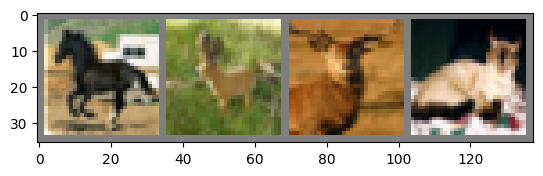

horse deer  deer  cat  


In [1]:
from model import *
from utils import imshow

In [2]:
device = 'cpu'
if torch.backends.mps.is_available(): # type: ignore
    device = 'mps'  # enables training on the Macbook Pro's GPU
elif torch.cuda.is_available():
    device = 'cuda:0'

print(device)

print(torch.cuda.device_count())

net.to(device)

if torch.cuda.device_count() > 1:
    net = nn.DataParallel(net)

mps
0


In [3]:
train(device)

[1,  2000] loss: 2.205
[1,  4000] loss: 1.834
[1,  6000] loss: 1.651
[1,  8000] loss: 1.562
[1, 10000] loss: 1.545
[1, 12000] loss: 1.489
[2,  2000] loss: 1.415
[2,  4000] loss: 1.384
[2,  6000] loss: 1.369
[2,  8000] loss: 1.334
[2, 10000] loss: 1.326
[2, 12000] loss: 1.296
Finished Training


In [4]:
PATH = './cifar_net_gpu.pth'
torch.save(net.state_dict(), PATH)

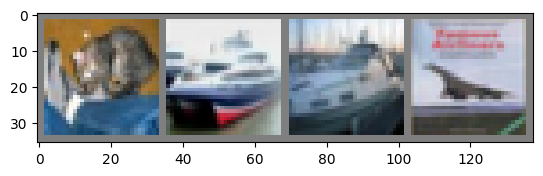

GroundTruth:  cat   ship  ship  plane


In [5]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [6]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
outputs = net(images)

In [8]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  truck plane


In [9]:
test(device)

Accuracy of the network on the 10000 test images: 53 %
Accuracy for class: plane is 67.4 %
Accuracy for class: car   is 68.6 %
Accuracy for class: bird  is 24.3 %
Accuracy for class: cat   is 34.2 %
Accuracy for class: deer  is 49.0 %
Accuracy for class: dog   is 46.9 %
Accuracy for class: frog  is 58.7 %
Accuracy for class: horse is 76.4 %
Accuracy for class: ship  is 61.2 %
Accuracy for class: truck is 53.1 %
